In [2]:
import nbmerge
!nbmerge "Red Wine Analysis.ipynb" "White Wine Analysis.ipynb" "Red and White Wine (Comparitive Analysis).ipynb" > "Wine Analysis.ipynb"

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
%matplotlib inline


In [3]:
red_wine_df = pd.read_csv("winequality-red.csv", sep = ';')
red_wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [4]:
red_wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
red_wine_df.describe( )

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


G:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


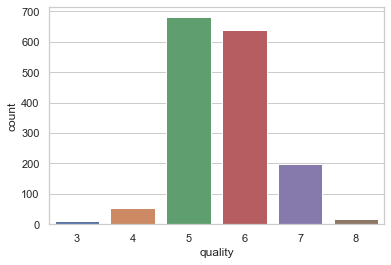

In [27]:
sns.set_style('whitegrid')
sns.countplot(red_wine_df.quality);

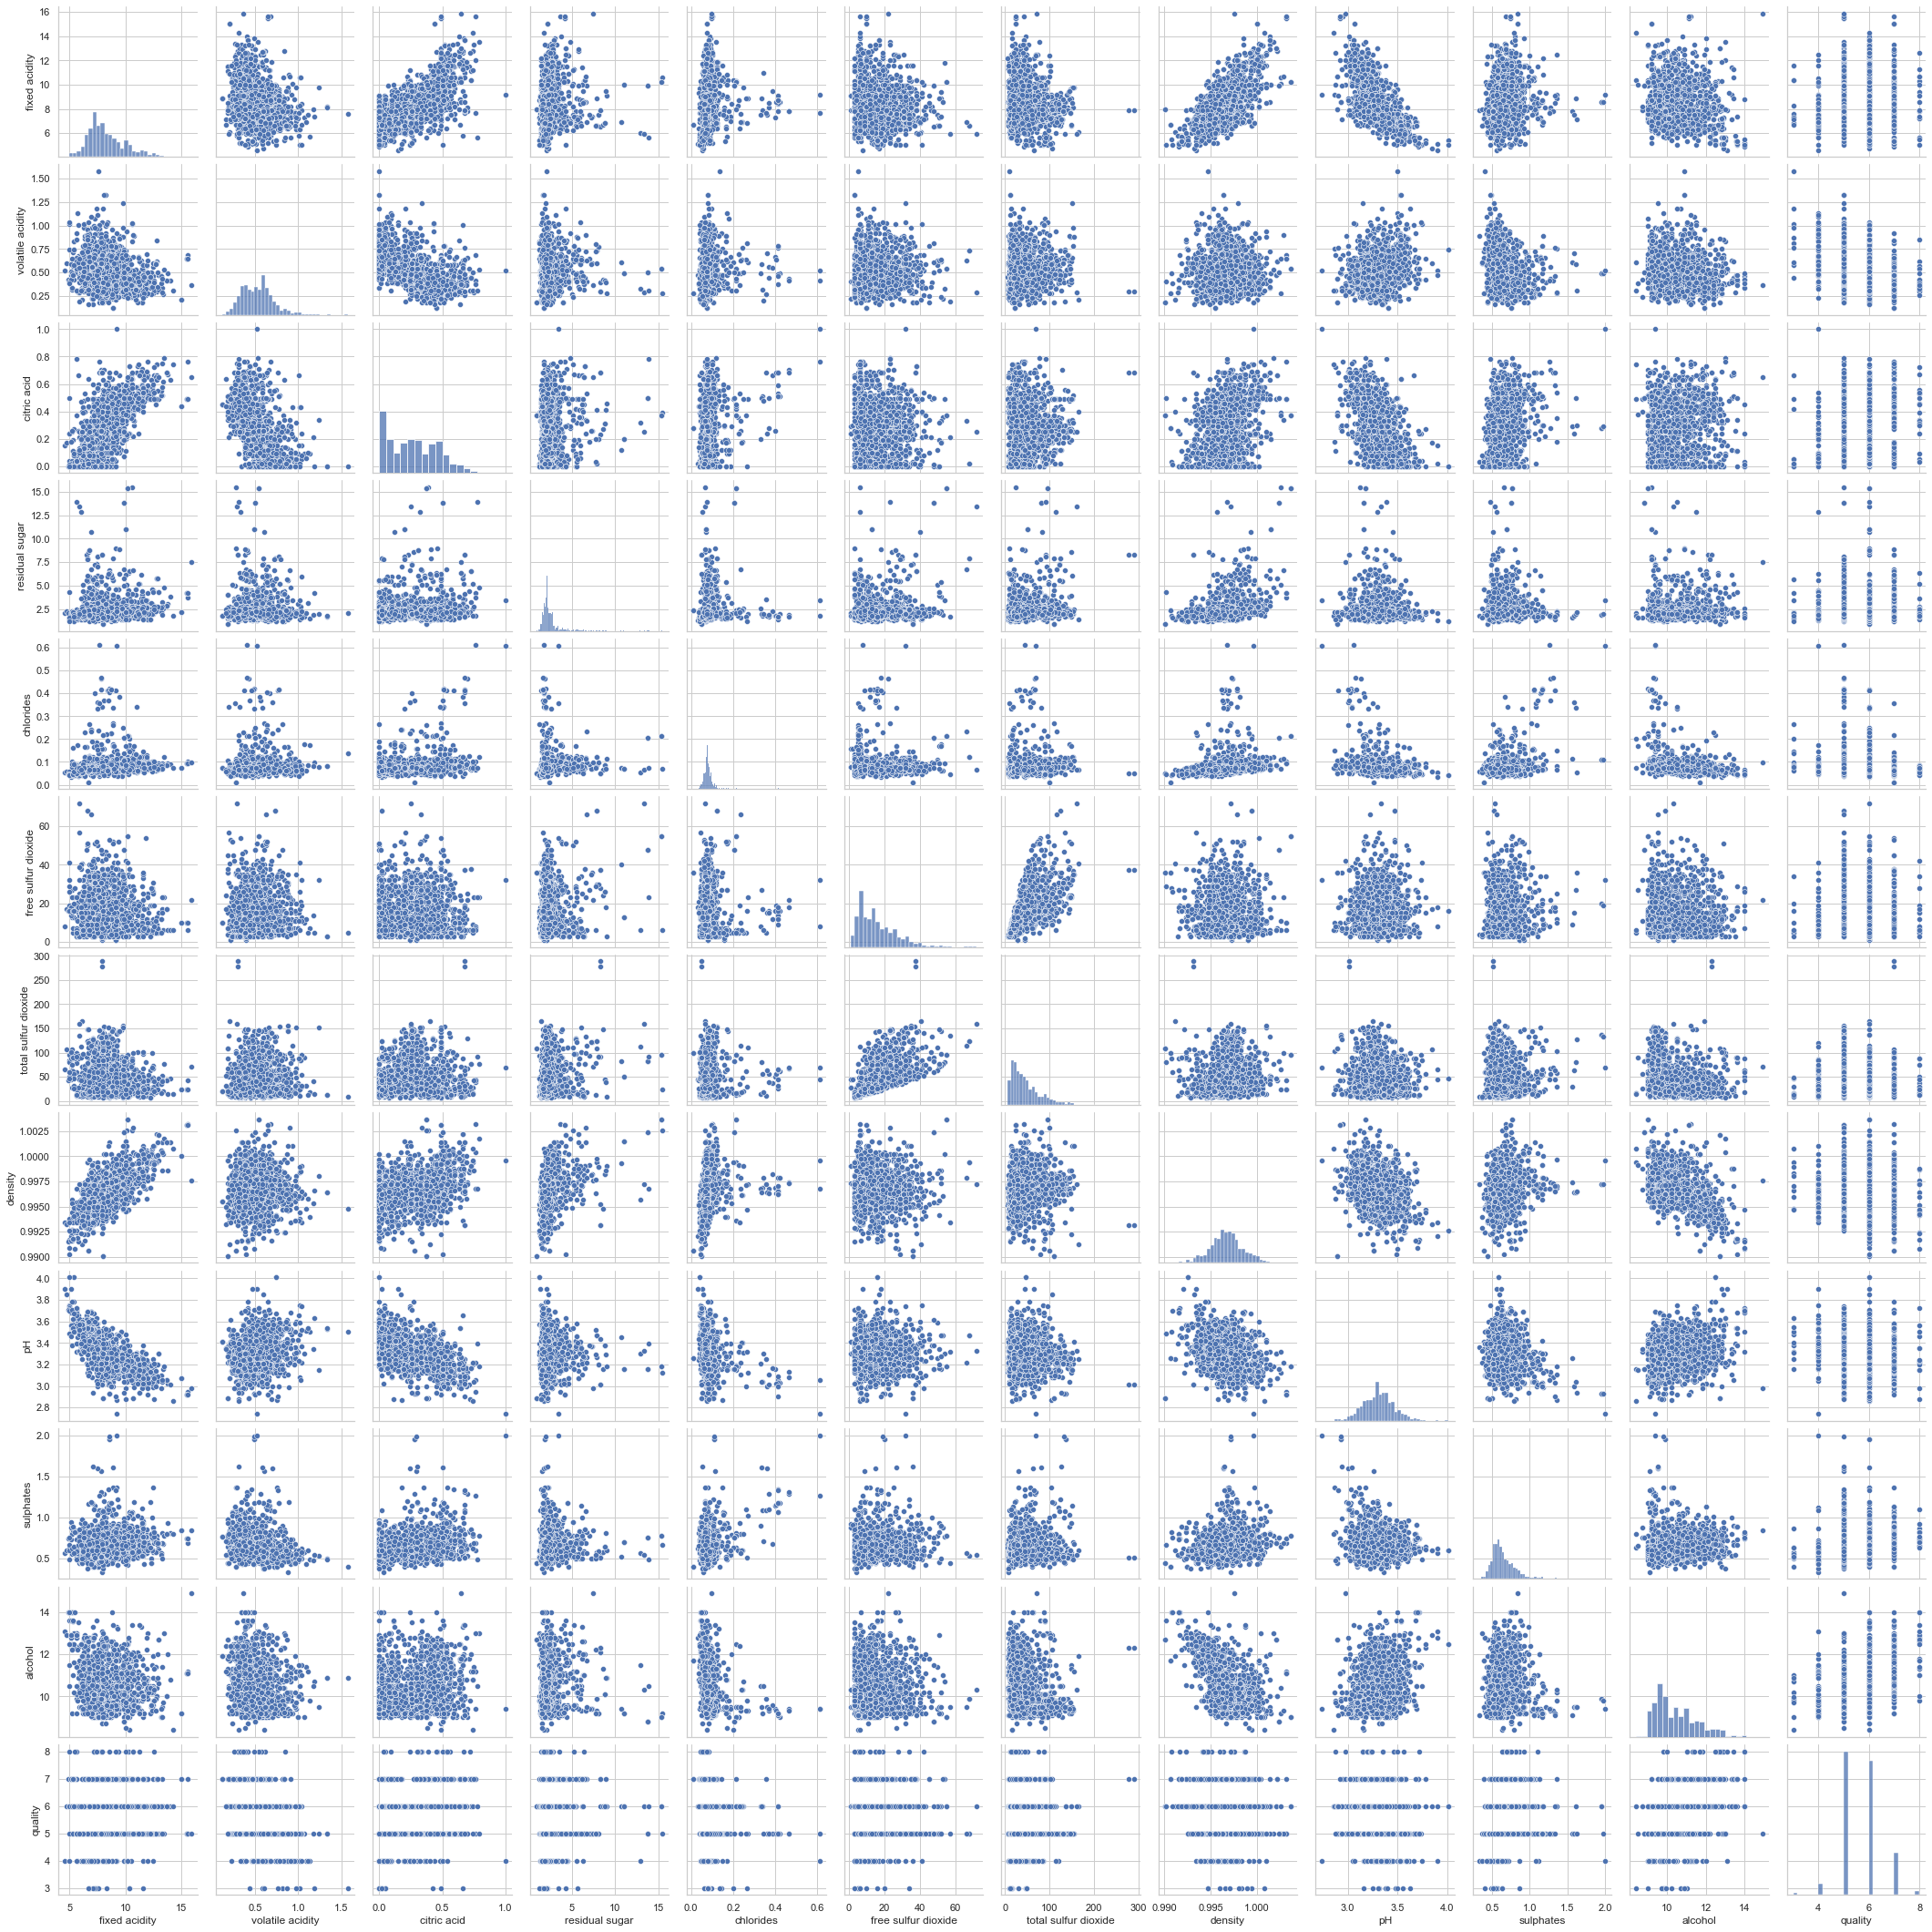

In [28]:
sns.pairplot(red_wine_df);

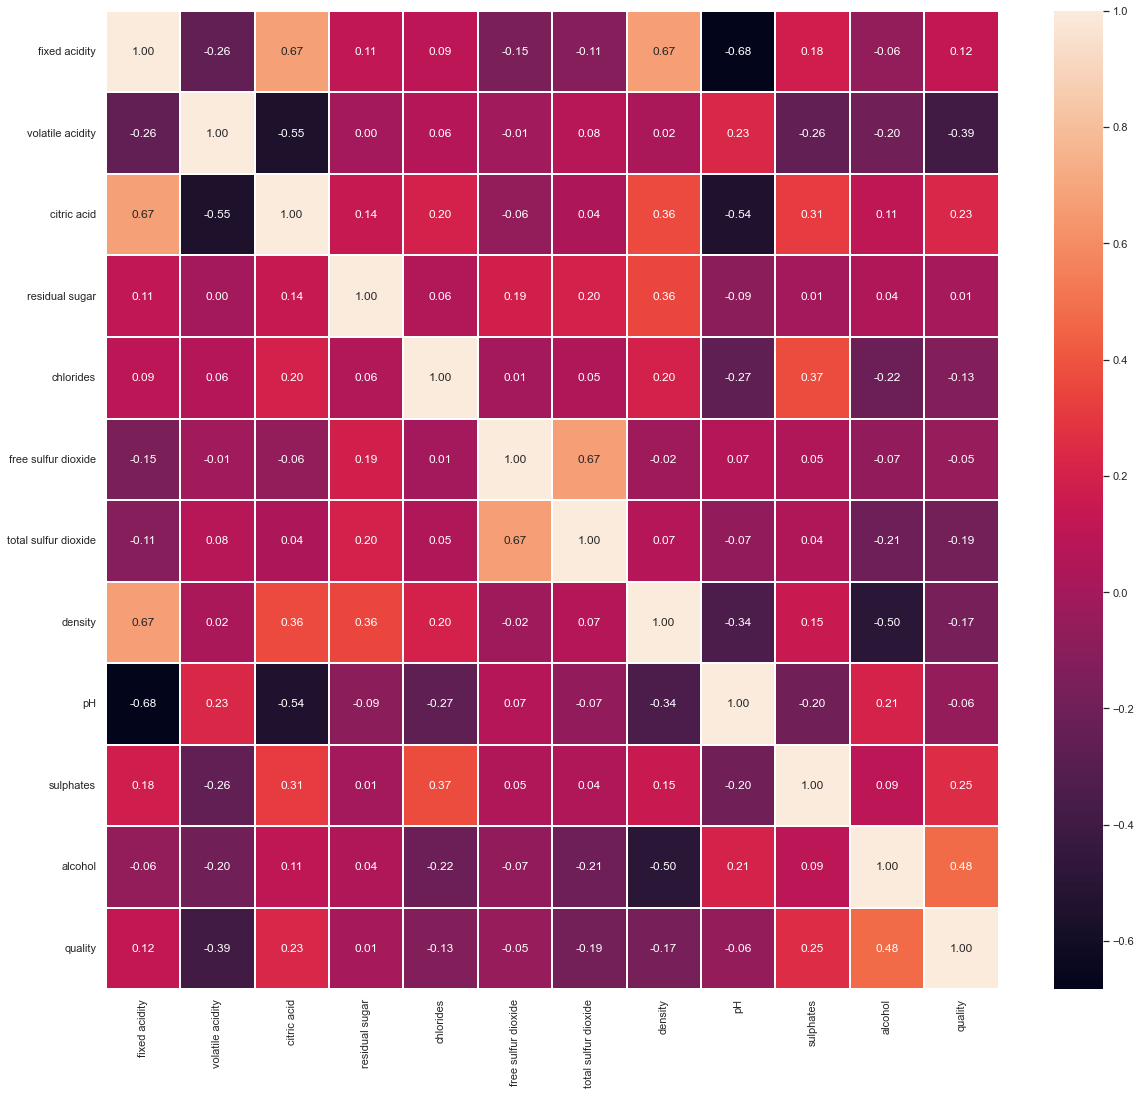

In [29]:
sns.set(rc = {'figure.figsize': (20,18)})
sns.heatmap(red_wine_df.corr(), annot = True, fmt = '.2f', linewidths = 2 );

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

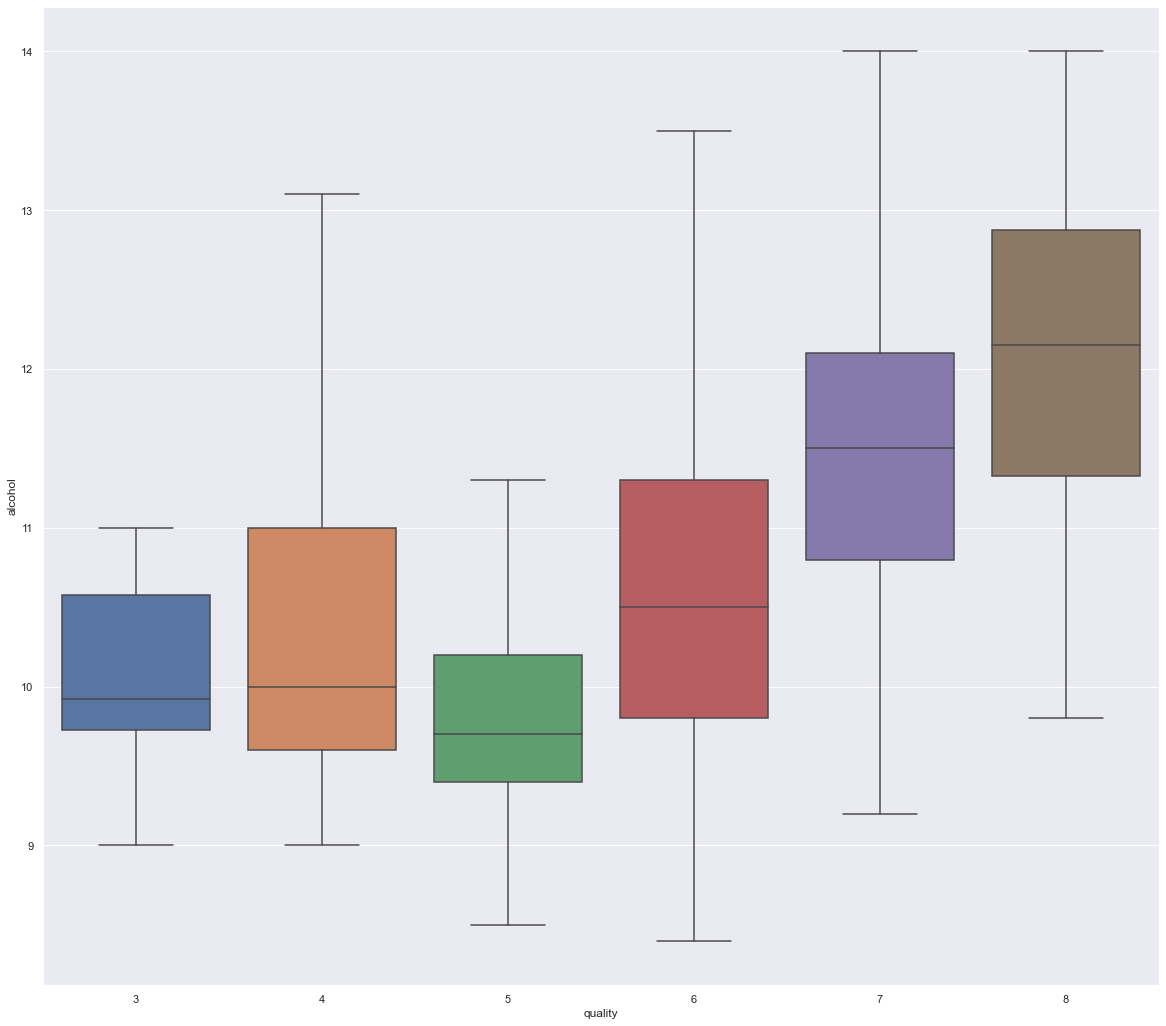

In [30]:
sns.boxplot(data = red_wine_df, x = 'quality', y = 'alcohol', showfliers = False)

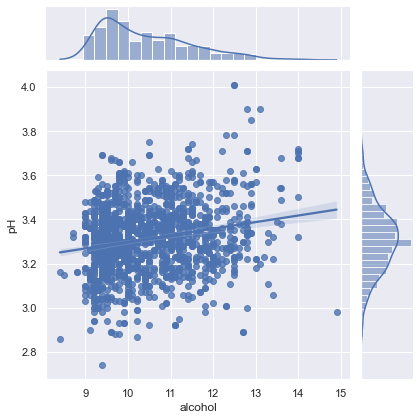

In [31]:
sns.jointplot(data = red_wine_df, x = 'alcohol', y = 'pH', kind = 'reg')

In [21]:
ss.pearsonr(red_wine_df.alcohol, red_wine_df.pH)

(0.2056325085054989, 9.964497741462162e-17)

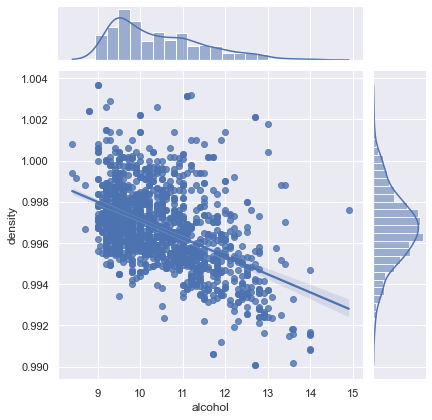

In [32]:
sns.jointplot(data = red_wine_df, x = 'alcohol', y = 'density', kind = 'reg')

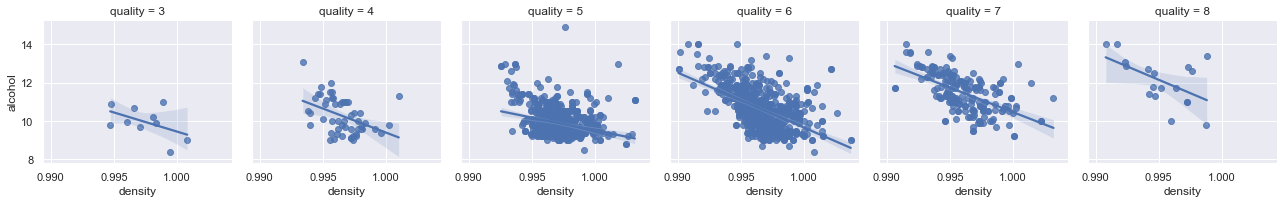

In [33]:
g = sns.FacetGrid(red_wine_df, col = 'quality')
g.map(sns.regplot, 'density', 'alcohol')

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

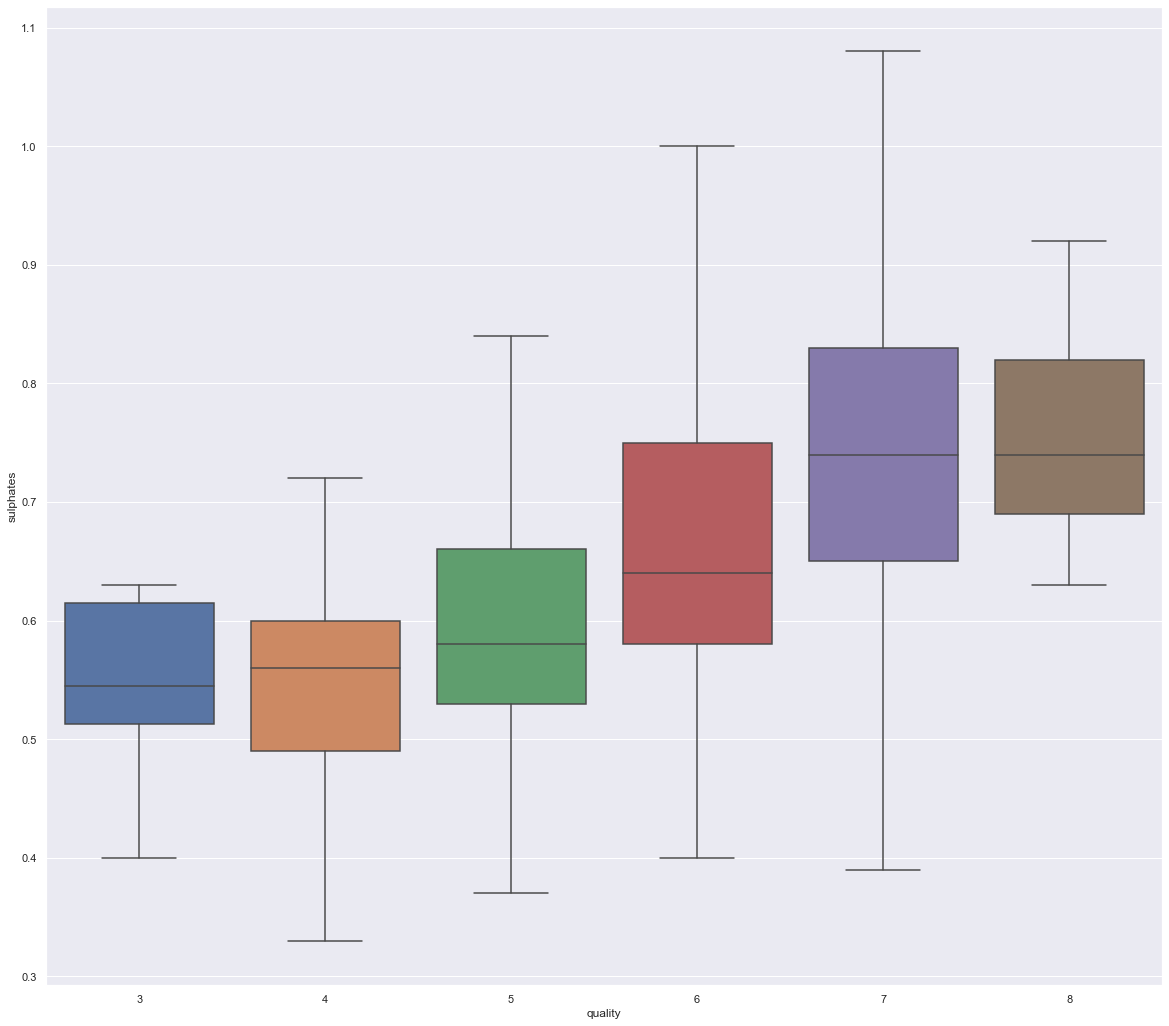

In [34]:
sns.boxplot(data = red_wine_df, x = 'quality', y = 'sulphates', showfliers = False)

<AxesSubplot:xlabel='quality', ylabel='total sulfur dioxide'>

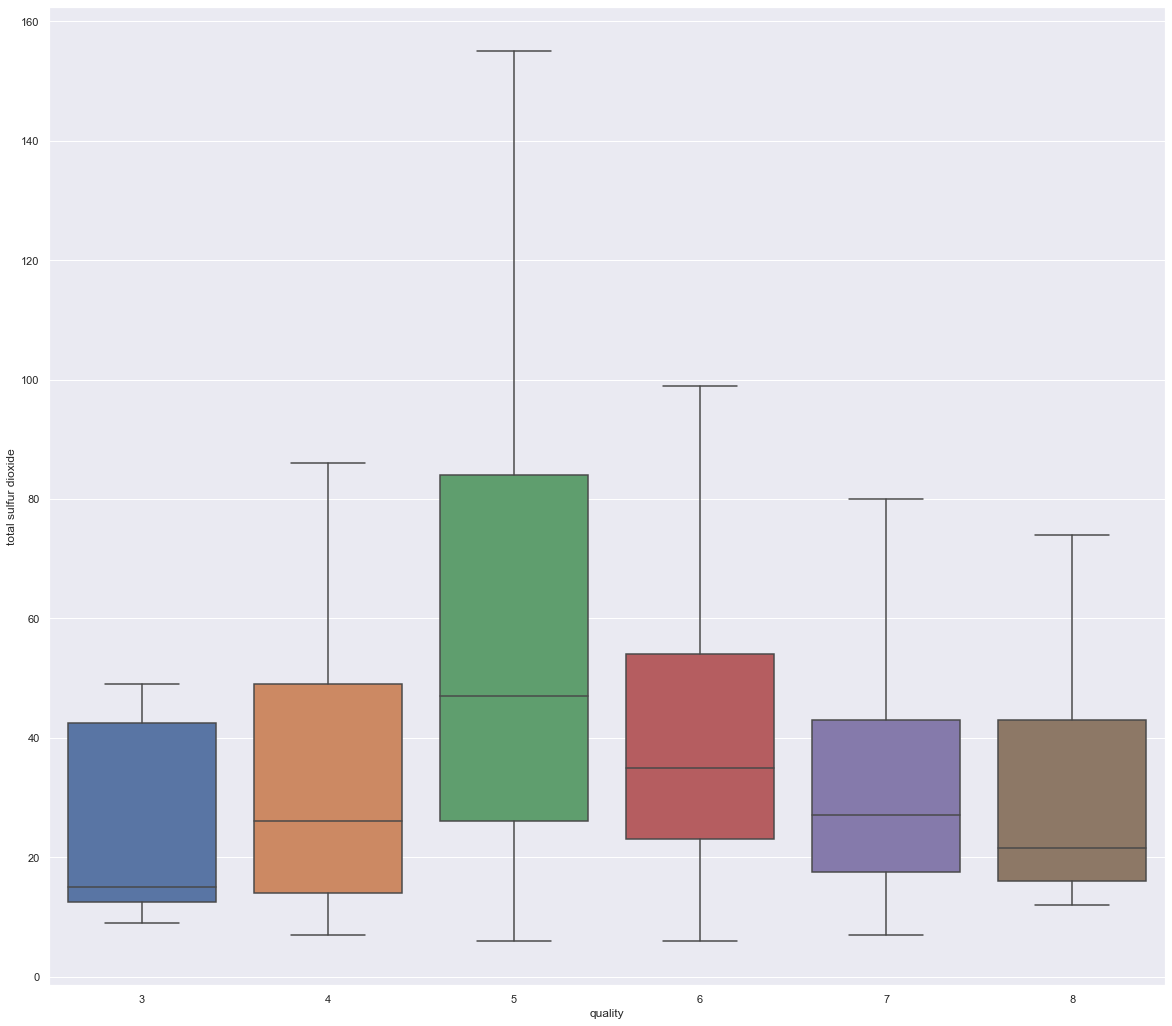

In [35]:
sns.boxplot(data = red_wine_df, x = 'quality', y = 'total sulfur dioxide', showfliers = False)	

<AxesSubplot:xlabel='quality', ylabel='free sulfur dioxide'>

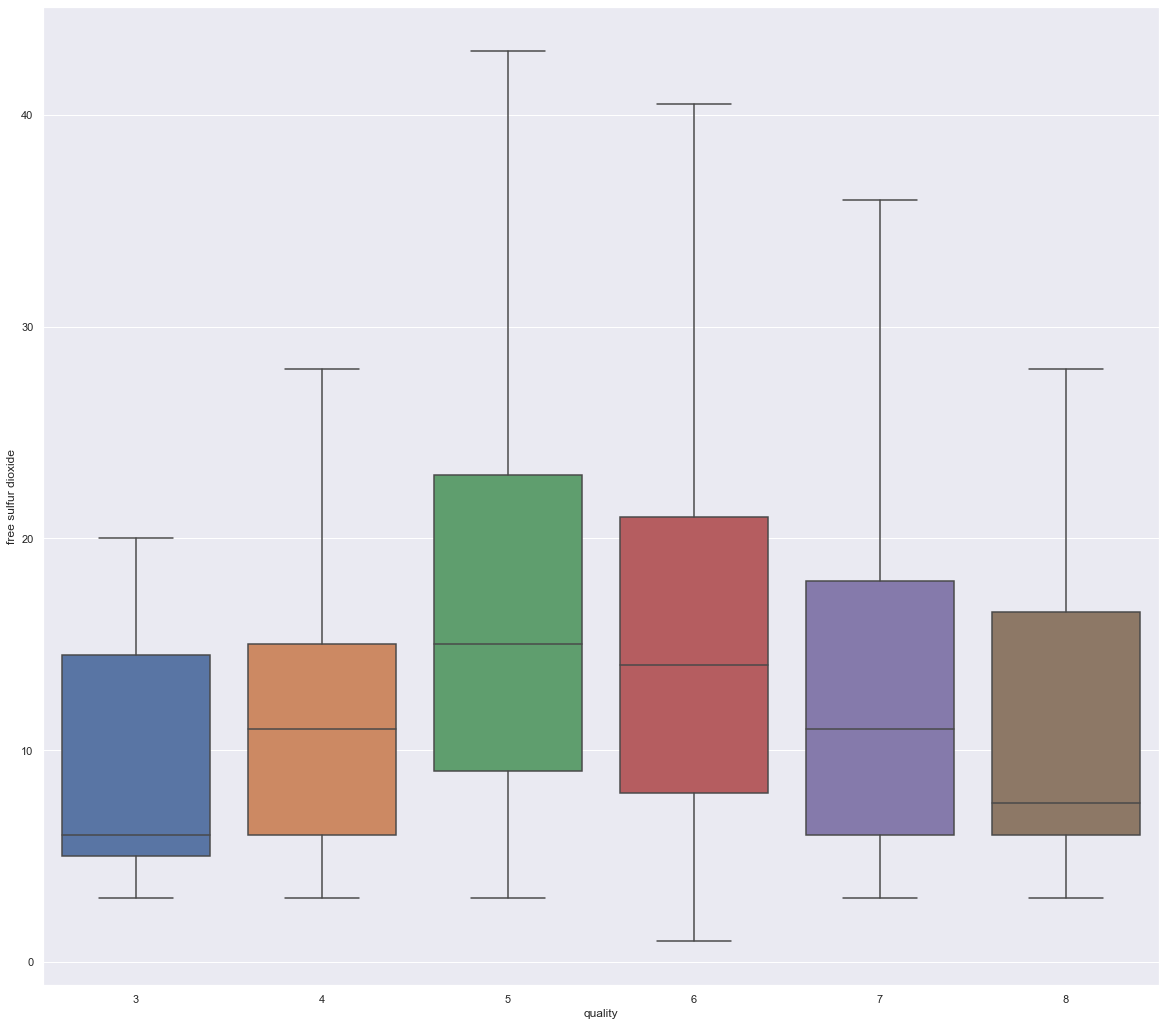

In [37]:
sns.boxplot(data = red_wine_df, x = 'quality', y = 'free sulfur dioxide', showfliers = False)	

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

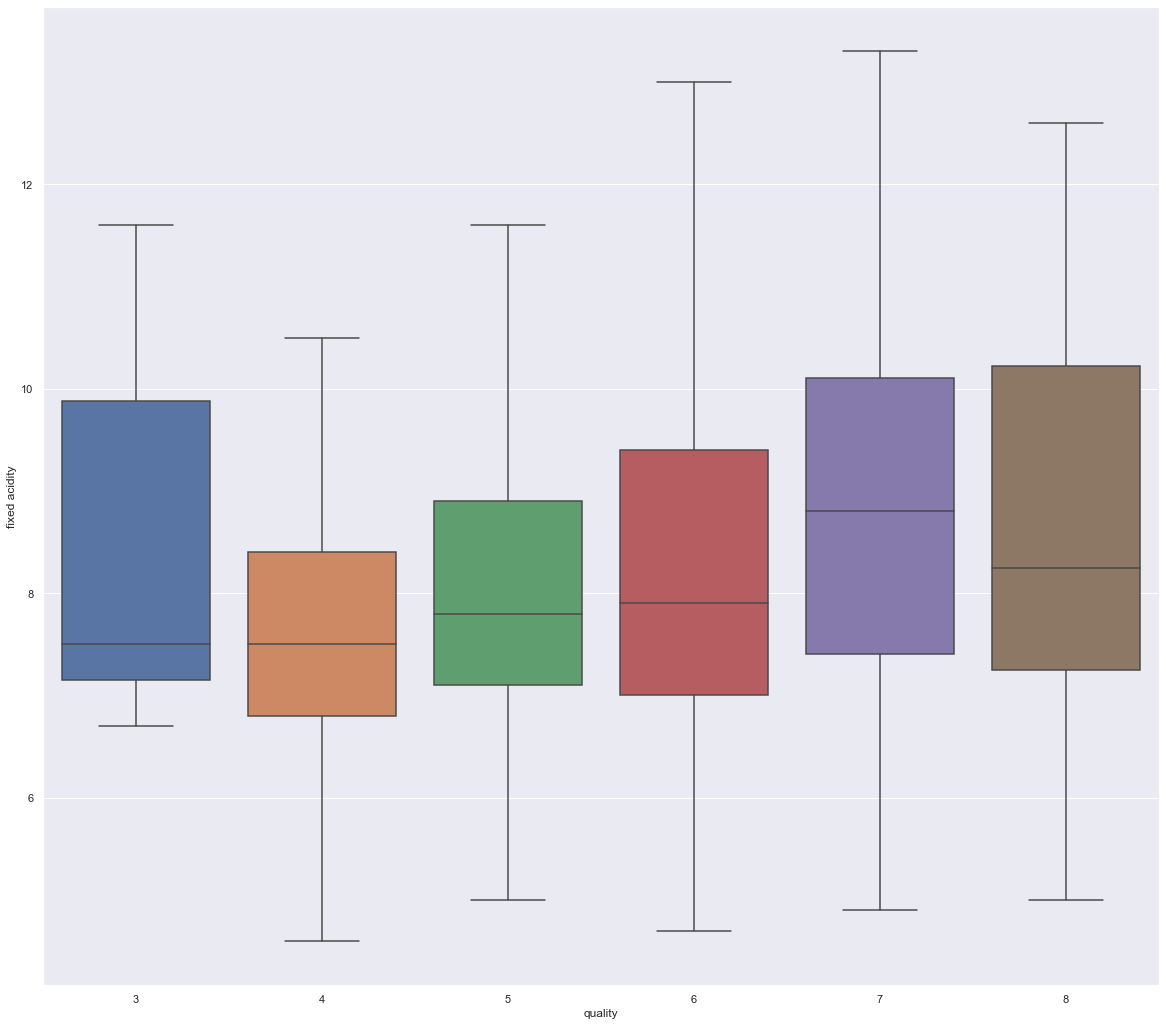

In [38]:
sns.boxplot(data = red_wine_df, x = 'quality', y = 'fixed acidity', showfliers = False)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

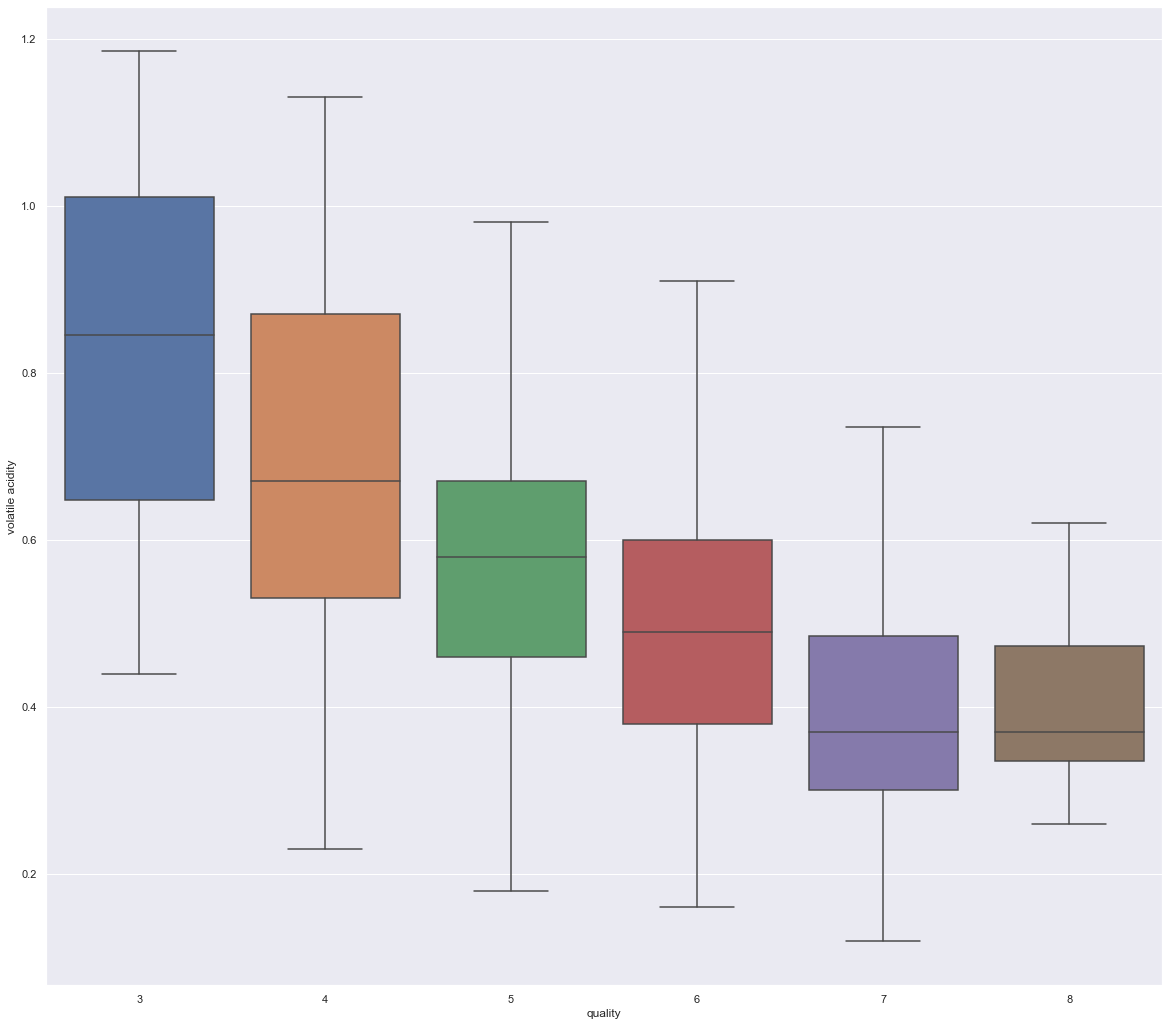

In [42]:
sns.boxplot(data = red_wine_df, x = 'quality', y = 'volatile acidity', showfliers = False)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

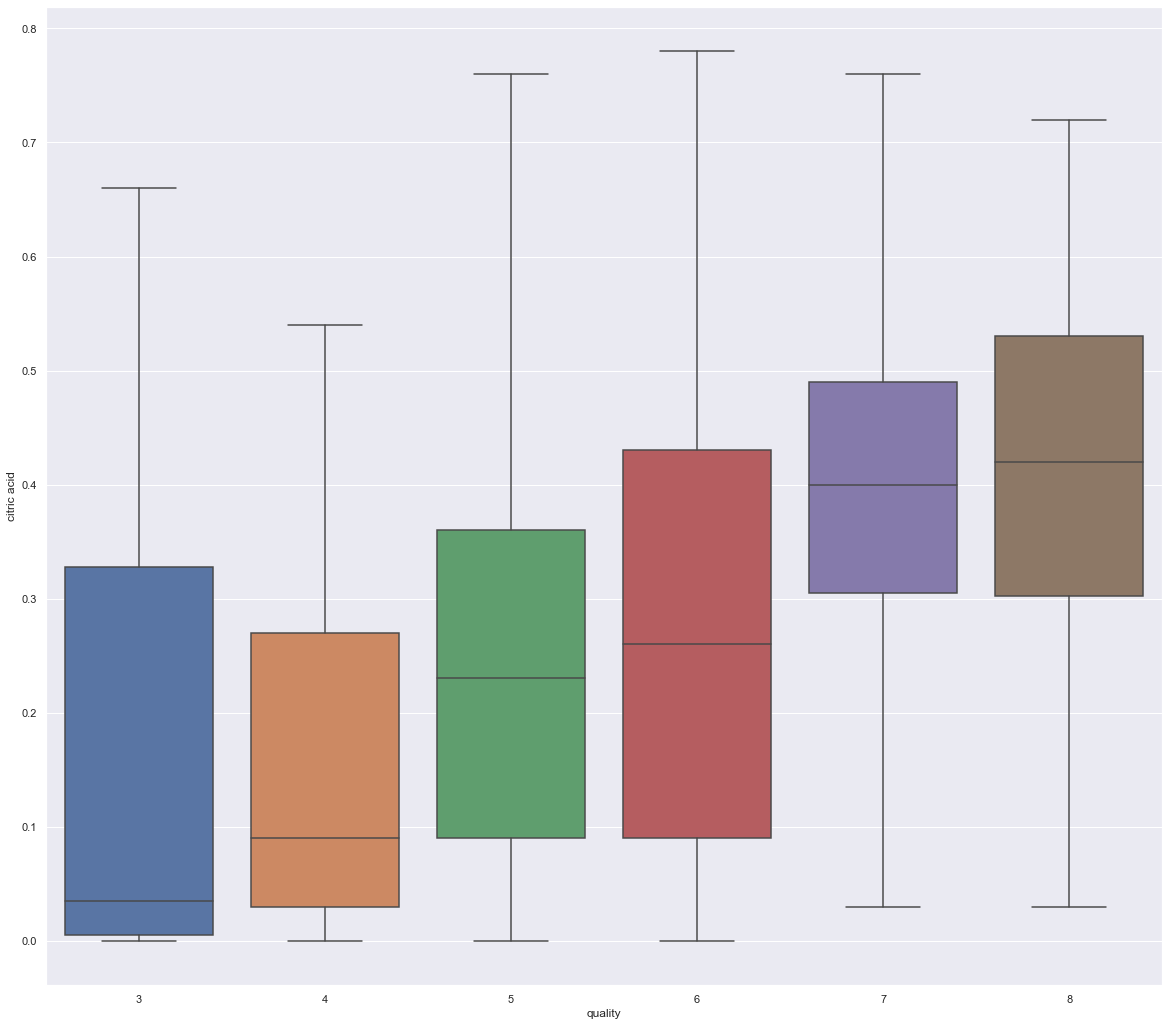

In [43]:
sns.boxplot(data = red_wine_df, x = 'quality', y = 'citric acid', showfliers = False)